# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
import HouseholdSpecializationModel as HSM

# Question 1

**Explain how you solve the model**

In [2]:
model = HSM.HouseholdSpecializationModelClass()

alpha_vector = [0.25,0.5,0.75]
sigma_vector = [0.5, 1, 1.5]
df = pd.DataFrame(columns= alpha_vector, index= sigma_vector)


for i in alpha_vector:
    for j in sigma_vector:
        model.par.alpha = i
        model.par.sigma = j
        results =model.solve_discrete()
        ratio = results.HF/results.HM
        df.loc[j,i] = ratio

#print(ratio)
print(df)





/Users/carolinebergholdthansen/Desktop/Introduction to Programming/projects-2023-cbjk/inauguralproject/HouseholdSpecializationModel.py:64: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/carolinebergholdthansen/Desktop/Introduction to Programming/projects-2023-cbjk/inauguralproject/HouseholdSpecializationModel.py:64: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/carolinebergholdthansen/Desktop/Introduction to Programming/projects-2023-cbjk/inauguralproject/HouseholdSpecializationModel.py:69: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


         0.25 0.50      0.75
0.5  0.545455  1.0  1.833333
1.0  0.307692  1.0      3.25
1.5  0.214286  1.0  4.666667


/Users/carolinebergholdthansen/Desktop/Introduction to Programming/projects-2023-cbjk/inauguralproject/HouseholdSpecializationModel.py:69: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


    wf   H ratio   w ratio
0  0.8  0.223144 -0.223144
1  0.9  0.000000 -0.105361
2  1.0  0.000000  0.000000
3  1.1 -0.117783  0.095310
4  1.2 -0.223144  0.182322


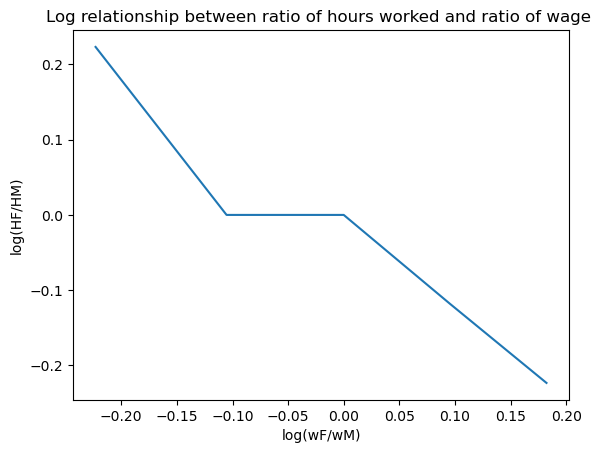

In [72]:
model.par.alpha = 0.5
model.par.sigma = 1

plot_df = pd.DataFrame({"wf": model.par.wF_vec})
logratioH=[]
logratiow=[]


for i in model.par.wF_vec:
    model.par.wF = i
    results =model.solve_discrete()
    logratioH.append(np.log(results.HF/results.HM))
    logratiow.append(np.log(i/model.par.wM))

plot_df["H ratio"] =  logratioH
plot_df["w ratio"] =  logratiow
print(plot_df)

fig = plt.figure()

# b. plot
ax = fig.add_subplot(1,1,1)

ax.plot(plot_df["w ratio"],plot_df["H ratio"])

ax.set_title('Log relationship between ratio of hours worked and ratio of wage ')
ax.set_xlabel('log(wF/wM)')
ax.set_ylabel('log(HF/HM)');

        





    wf   H ratio   w ratio
0  0.8  0.130284 -0.223144
1  0.9  0.000203 -0.105361
2  1.0  0.000000  0.000000
3  1.1 -0.000141  0.095310
4  1.2 -0.103383  0.182322


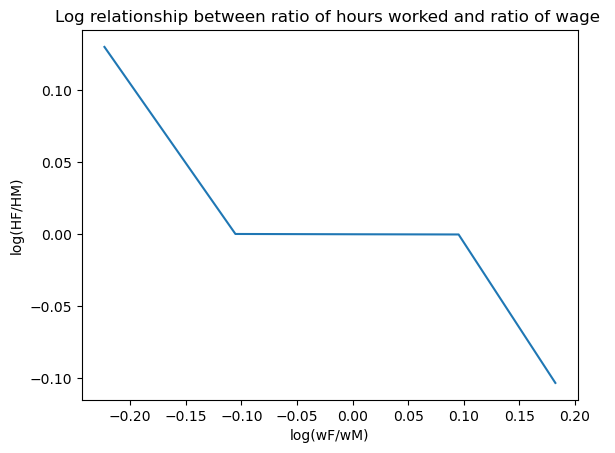

In [73]:
plot_dfc = pd.DataFrame({"wf": model.par.wF_vec})
logratioHc=[]
logratiowc=[]


#logratiow = pd.DataFrame(index= model.par.wF_vec)

for i in model.par.wF_vec:
    model.par.wF = i
    resultsc =model.solve()
    logratioHc.append(np.log(resultsc.HF/resultsc.HM))
    logratiowc.append(np.log(i/model.par.wM))

plot_dfc["H ratio"] =  logratioHc
plot_dfc["w ratio"] =  logratiowc
print(plot_dfc)

figc = plt.figure()

# b. plot
ax = figc.add_subplot(1,1,1)

ax.plot(plot_dfc["w ratio"],plot_dfc["H ratio"])

ax.set_title('Log relationship between ratio of hours worked and ratio of wage ')
ax.set_xlabel('log(wF/wM)')
ax.set_ylabel('log(HF/HM)');


In [87]:
model.estimate()


/Users/carolinebergholdthansen/Desktop/Introduction to Programming/projects-2023-cbjk/inauguralproject/HouseholdSpecializationModel.py:64: RuntimeWarning: overflow encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/carolinebergholdthansen/Desktop/Introduction to Programming/projects-2023-cbjk/inauguralproject/HouseholdSpecializationModel.py:64: RuntimeWarning: invalid value encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/carolinebergholdthansen/Desktop/Introduction to Programming/projects-2023-cbjk/inauguralproject/HouseholdSpecializationModel.py:64: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


 final_simplex: (array([[0.08827862, 0.98967753],
       [0.08837316, 0.98962354],
       [0.08830517, 0.98965607]]), array([1.34980355e-09, 1.79176186e-09, 2.28345748e-09]))
           fun: 1.3498035463771478e-09
       message: 'Optimization terminated successfully.'
          nfev: 92
           nit: 48
        status: 0
       success: True
             x: array([0.08827862, 0.98967753])

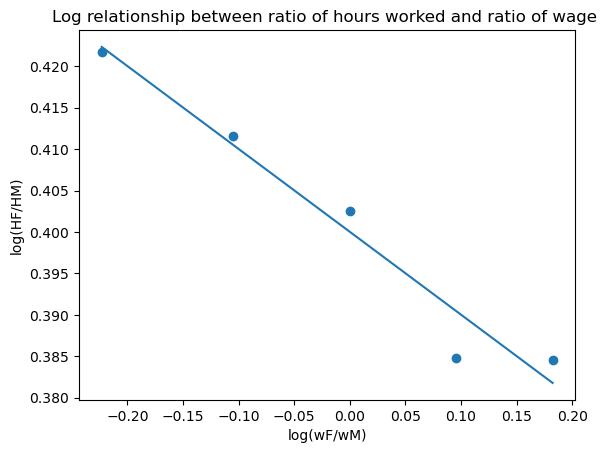

In [74]:
rationy = np.log(model.sol.HF_vec/model.sol.HM_vec)

figc = plt.figure()

# b. plot
ax = figc.add_subplot(1,1,1)

ax.scatter(np.log(model.par.wF_vec),rationy)
ax.plot(np.log(model.par.wF_vec),model.sol.beta0+model.sol.beta1*np.log(model.par.wF_vec))

ax.set_title('Log relationship between ratio of hours worked and ratio of wage ')
ax.set_xlabel('log(wF/wM)')
ax.set_ylabel('log(HF/HM)');

In [90]:
model.estimate(alpha=0.5)

( final_simplex: (array([[0.13505859],
        [0.13496094]]), array([0.15973888, 0.15973888]))
            fun: 0.15973887863345282
        message: 'Optimization terminated successfully.'
           nfev: 30
            nit: 15
         status: 0
        success: True
              x: array([0.13505859]),
 0.5)

In [88]:
model.solve_wF_vec()

namespace(LM_vec=array([6.24934174, 5.74332806, 5.25940919, 4.36946312, 4.21595457]),
          HM_vec=array([3.47422613, 3.46029302, 3.44375285, 3.49680619, 3.45365577]),
          LF_vec=array([2.51500281, 3.09198695, 3.57663242, 4.30741572, 4.34978897]),
          HF_vec=array([5.29658706, 5.22221553, 5.15047823, 5.13806879, 5.07332708]),
          beta0=0.40001845529653274,
          beta1=-0.09996823200389911)

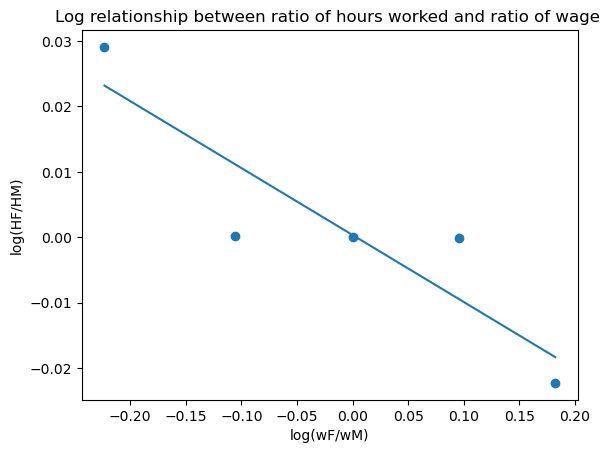

In [91]:
rationy = np.log(model.sol.HF_vec/model.sol.HM_vec)

figc = plt.figure()

# b. plot
ax = figc.add_subplot(1,1,1)

ax.scatter(np.log(model.par.wF_vec),rationy)
ax.plot(np.log(model.par.wF_vec),model.sol.beta0+model.sol.beta1*np.log(model.par.wF_vec))

ax.set_title('Log relationship between ratio of hours worked and ratio of wage ')
ax.set_xlabel('log(wF/wM)')
ax.set_ylabel('log(HF/HM)');

# Question 2

Explain your code and procedure

In [75]:
# code

# Question 3

Explain your code and procedure

In [76]:
# code

ADD CONCISE CONLUSION.